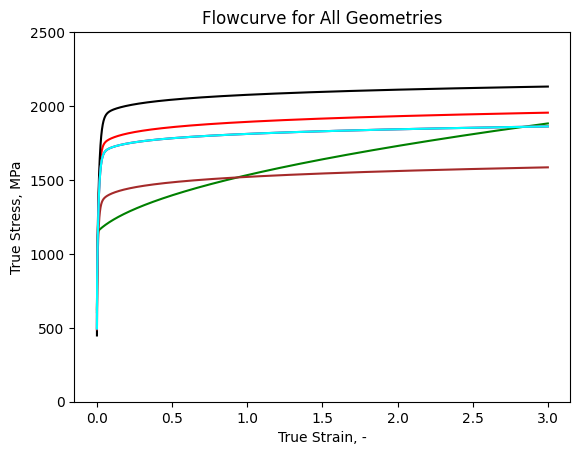

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def swiftVoceT(x, c1, c2, c3, c4, c5, c6, c7):
    return c1*c2*(x + c3) ** c4  +  (1-c1)*c5+ c6* (1 - np.exp(-c7 * x))

truePlasticStrain = np.arange(0, 3.0005, 0.0005)
y_line_maxStress_sw_predicted_clipped = swiftVoceT(truePlasticStrain, 0.4459129273891449, 1200.0, 0.0010000000474974513, 0.10000000149011612, 645.9520874023438, 1000.0, 100.0)
y_line_maxStress_sw_ideal = swiftVoceT(truePlasticStrain, 0.5, 1300, 2.3 * 10**-14, 0.075, 773.18, 1039.37, 73.94)
y_line_maxStress_sw_pca = swiftVoceT(truePlasticStrain, 0.4864811301231384, 991.1851806640625, 0.0514100082218647, 0.5016633868217468, 968.5540771484375, 541.0698852539062, 500.37640380859375)
y_line_maxStress_sw_pca_fifty_deviation = swiftVoceT(truePlasticStrain, 0.4945, 991.3171, 0, 0.1125, 968.0074, 541.3438, 110.9100)
y_line_maxStress_sw_pca_twenty_deviation = swiftVoceT(truePlasticStrain, 0.4662, 1040.0000, 0, 0.0900, 927.8160, 831.4960, 88.7280)
y_line_maxStress_sw_pca_ten_deviation = swiftVoceT(truePlasticStrain, 0.4500, 1170.0000, 0, 0.0825, 850.4980, 935.4330, 81.3340)
y_line_maxStress_sw_pca_five_deviation = swiftVoceT(truePlasticStrain, 0.4903, 1235.0000, 0, 0.0788, 811.8390, 987.4015, 77.6370)

plt.figure(1)
plt.plot(truePlasticStrain, y_line_maxStress_sw_predicted_clipped, color='red', label='predicted random clipped')
plt.plot(truePlasticStrain, y_line_maxStress_sw_ideal, color='black', label='ideal')
plt.plot(truePlasticStrain, y_line_maxStress_sw_pca, color='green', label='pca')

#No visible difference between 5,10,20% confidence intervals. 50% is not accurate. It may be best to choose 20%
plt.plot(truePlasticStrain, y_line_maxStress_sw_pca_fifty_deviation, color='brown', label='pca 50%')
plt.plot(truePlasticStrain, y_line_maxStress_sw_pca_twenty_deviation, color='pink', label='pca 20%')
plt.plot(truePlasticStrain, y_line_maxStress_sw_pca_twenty_deviation, color='purple', label='pca 10%')
plt.plot(truePlasticStrain, y_line_maxStress_sw_pca_twenty_deviation, color='cyan', label='pca 5%')


plt.title('Flowcurve for All Geometries')
#plt.xlim(left=0.0, right=3)
plt.ylim(bottom=0, top=2500)
plt.xlabel('True Strain, -')
plt.ylabel('True Stress, MPa')
plt.show()


In [25]:
# Individual errors for the 5% deviation
errors_5_percent = [2, 5, 100, 4, 5, 5, 5]  # These are the errors for c1 to c7

# Calculate the average error
average_error_5_percent = sum(errors_5_percent) / len(errors_5_percent)

print(f'Average error: {average_error_5_percent:.2f}%')

sorted_errors = sorted(errors_5_percent)
n = len(sorted_errors)
if n % 2 == 1:
    median_error_5_percent = sorted_errors[n // 2]
else:
    middle1 = sorted_errors[n // 2 - 1]
    middle2 = sorted_errors[n // 2]
    median_error_5_percent = (middle1 + middle2) / 2

print(f'Median error: {median_error_5_percent:.2f}%')

Average error: 18.00%
Median error: 5.00%


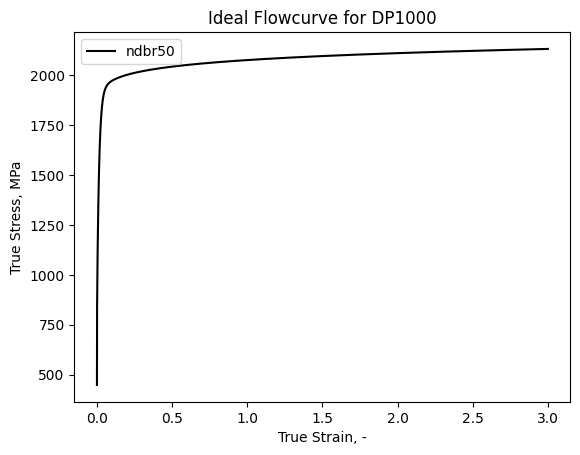

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def swiftVoceT(x, c1, c2, c3, c4, c5, c6, c7):
    return c1*c2*(x + c3) ** c4  +  (1-c1)*c5+ c6* (1 - np.exp(-c7 * x))

truePlasticStrain = np.arange(0, 3.0005, 0.0005)
y_line_maxStress_sw_ndbr50 = swiftVoceT(truePlasticStrain, 0.5, 1300, 2.3 * 10**-14, 0.075, 773.18, 1039.37, 73.94)

fig1, ax1 = plt.subplots()

plt.figure(1)
plt.plot(truePlasticStrain, y_line_maxStress_sw_ndbr50, color='black', label='ndbr50')

plt.title('Ideal Flowcurve for DP1000')
#plt.xlim(left=0.0, right=3)
#plt.ylim(bottom=0, top=2000)
plt.xlabel('True Strain, -')
plt.ylabel('True Stress, MPa')
ax1.legend()
plt.show()
